In [439]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[1] "machine-failure-prediction-using-sensor-data"

# **Import**

In [440]:
library(dplyr)
library(ggplot2)
library(gridExtra)
library(psych)
library(ggcorrplot)
library(skimr)

# **1. Data Import & EDA**

In [441]:
df <- read.csv('/kaggle/input/machine-failure-prediction-using-sensor-data/data.csv')

**Variable Description**
>**footfall: The number of people or objects passing by the machine.**   
>**tempMode: The temperature mode or setting of the machine.**   
>**AQ: Air quality index near the machine.**   
>**USS: Ultrasonic sensor data, indicating proximity measurements.**   
>**CS: Current sensor readings, indicating the electrical current usage of the machine.**   
>**VOC: Volatile organic compounds level detected near the machine.**   
>**RP: Rotational position or RPM (revolutions per minute) of the machine parts.**   
>**IP: Input pressure to the machine.**   
>**Temperature: The operating temperature of the machine.**   
>**fail: Binary indicator of machine failure (1 for failure, 0 for no failure).**   

In [442]:
str(df)

'data.frame':	944 obs. of  10 variables:
 $ footfall   : int  0 190 31 83 640 110 100 31 180 2800 ...
 $ tempMode   : int  7 1 7 4 7 3 7 1 7 0 ...
 $ AQ         : int  7 3 2 3 5 3 5 5 4 3 ...
 $ USS        : int  1 3 2 4 6 4 6 4 6 3 ...
 $ CS         : int  6 5 6 5 4 6 4 5 3 7 ...
 $ VOC        : int  6 1 1 1 0 1 1 4 3 0 ...
 $ RP         : int  36 20 24 28 68 21 77 21 31 39 ...
 $ IP         : int  3 4 6 6 6 4 4 4 4 3 ...
 $ Temperature: int  1 1 1 1 1 1 1 1 1 1 ...
 $ fail       : int  1 0 0 0 0 0 0 0 0 0 ...


In [443]:
describe(df)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
footfall,1,944,306.3813559,1082.6067451,22,66.4206349,32.6172,0,7300,7300,5.47240032,31.0986757,35.23584829
tempMode,2,944,3.7277542,2.6772346,3,3.7843915,4.4478,0,7,7,-0.01907829,-1.5206259,0.08713656
AQ,3,944,4.3252119,1.4384362,4,4.3822751,1.4826,1,7,6,-0.18048516,-0.7943595,0.04681711
USS,4,944,2.9396186,1.3837254,3,2.8267196,1.4826,1,7,6,0.80857122,0.3293025,0.04503643
CS,5,944,5.3940678,1.2693494,6,5.5582011,1.4826,1,7,6,-1.33320095,1.7058883,0.04131380
VOC,6,944,2.8421610,2.2733371,2,2.8029101,2.9652,0,6,6,0.12464262,-1.5721462,0.07399082
RP,7,944,47.0434322,16.4231305,44,46.0238095,16.3086,19,91,72,0.52343840,-0.5556235,0.53452737
IP,8,944,4.5656780,1.5992867,4,4.5608466,1.4826,1,7,6,0.01450256,-1.1721784,0.05205235
Temperature,9,944,16.3315678,5.9747808,17,17.0277778,5.9304,1,24,23,-0.91295819,0.0622910,0.19446255


In [444]:
#skim(df)

## **Check missing value**

In [445]:
colSums(is.na(df))

footfall    tempMode          AQ         USS          CS         VOC 
          0           0           0           0           0           0 
         RP          IP Temperature        fail 
          0           0           0           0

## **duplicate check**

In [446]:
sum(duplicated(df))

[1] 1

In [447]:
head(df)

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,7,7,1,6,6,36,3,1,1
2,190,1,3,3,5,1,20,4,1,0
3,31,7,2,2,6,1,24,6,1,0
4,83,4,3,4,5,1,28,6,1,0
5,640,7,5,6,4,0,68,6,1,0
6,110,3,3,4,6,1,21,4,1,0


# **2. Data Transform**

In [448]:
df <- df[-which(duplicated(df)),]

In [449]:
df <- na.omit(df)

### **Data Check**

In [450]:
str(df)

'data.frame':	943 obs. of  10 variables:
 $ footfall   : int  0 190 31 83 640 110 100 31 180 2800 ...
 $ tempMode   : int  7 1 7 4 7 3 7 1 7 0 ...
 $ AQ         : int  7 3 2 3 5 3 5 5 4 3 ...
 $ USS        : int  1 3 2 4 6 4 6 4 6 3 ...
 $ CS         : int  6 5 6 5 4 6 4 5 3 7 ...
 $ VOC        : int  6 1 1 1 0 1 1 4 3 0 ...
 $ RP         : int  36 20 24 28 68 21 77 21 31 39 ...
 $ IP         : int  3 4 6 6 6 4 4 4 4 3 ...
 $ Temperature: int  1 1 1 1 1 1 1 1 1 1 ...
 $ fail       : int  1 0 0 0 0 0 0 0 0 0 ...


# **3. Data Visualization**

## **Histogram**

In [451]:
options(repr.plot.width = 16.0, repr.plot.height = 16.0)

In [452]:
a <- ggplot(df) + geom_histogram(aes(x= footfall), fill = 'red', col = 'gray', binwidth = 1, position = 'dodge') + 
        labs(title = 'footfall Histogram', x = 'footfall', y = 'Count') + 
        theme_bw()

b <- ggplot(df) + geom_histogram(aes(x= tempMode), fill = 'red', col = 'gray', binwidth = 1, position = 'dodge') + 
        labs(title = 'tempMode Histogram', x = 'tempMode', y = 'Count') + 
        theme_bw()

c <- ggplot(df) + geom_histogram(aes(x= AQ), fill = 'red', col = 'gray', binwidth = 1, position = 'dodge') + 
        labs(title = 'AQ Histogram', x = 'AQ', y = 'Count') + 
        theme_bw()

d <- ggplot(df) + geom_histogram(aes(x= USS), fill = 'red', col = 'gray', binwidth = 1, position = 'dodge') + 
        labs(title = 'USS Histogram', x = 'USS', y = 'Count') + 
        theme_bw()

e <- ggplot(df) + geom_histogram(aes(x= CS), fill = 'red', col = 'gray', binwidth = 1, position = 'dodge') + 
        labs(title = 'CS Histogram', x = 'CS', y = 'Count') + 
        theme_bw()

f <- ggplot(df) + geom_histogram(aes(x= VOC), fill = 'red', col = 'gray', binwidth = 1, position = 'dodge') + 
        labs(title = 'VOC Histogram', x = 'VOC', y = 'Count') + 
        theme_bw()

g <- ggplot(df) + geom_histogram(aes(x= RP), fill = 'red', col = 'gray', binwidth = 1, position = 'dodge') + 
        labs(title = 'RP Histogram', x = 'RP', y = 'Count') + 
        theme_bw()

h <- ggplot(df) + geom_histogram(aes(x= IP), fill = 'red', col = 'gray', binwidth = 1, position = 'dodge') + 
        labs(title = 'IP Histogram', x = 'IP', y = 'Count') + 
        theme_bw()

i <- ggplot(df) + geom_histogram(aes(x= Temperature), fill = 'red', col = 'gray', binwidth = 1, position = 'dodge') + 
        labs(title = 'Temperature Histogram', x = 'Temperature', y = 'Count') + 
        theme_bw()


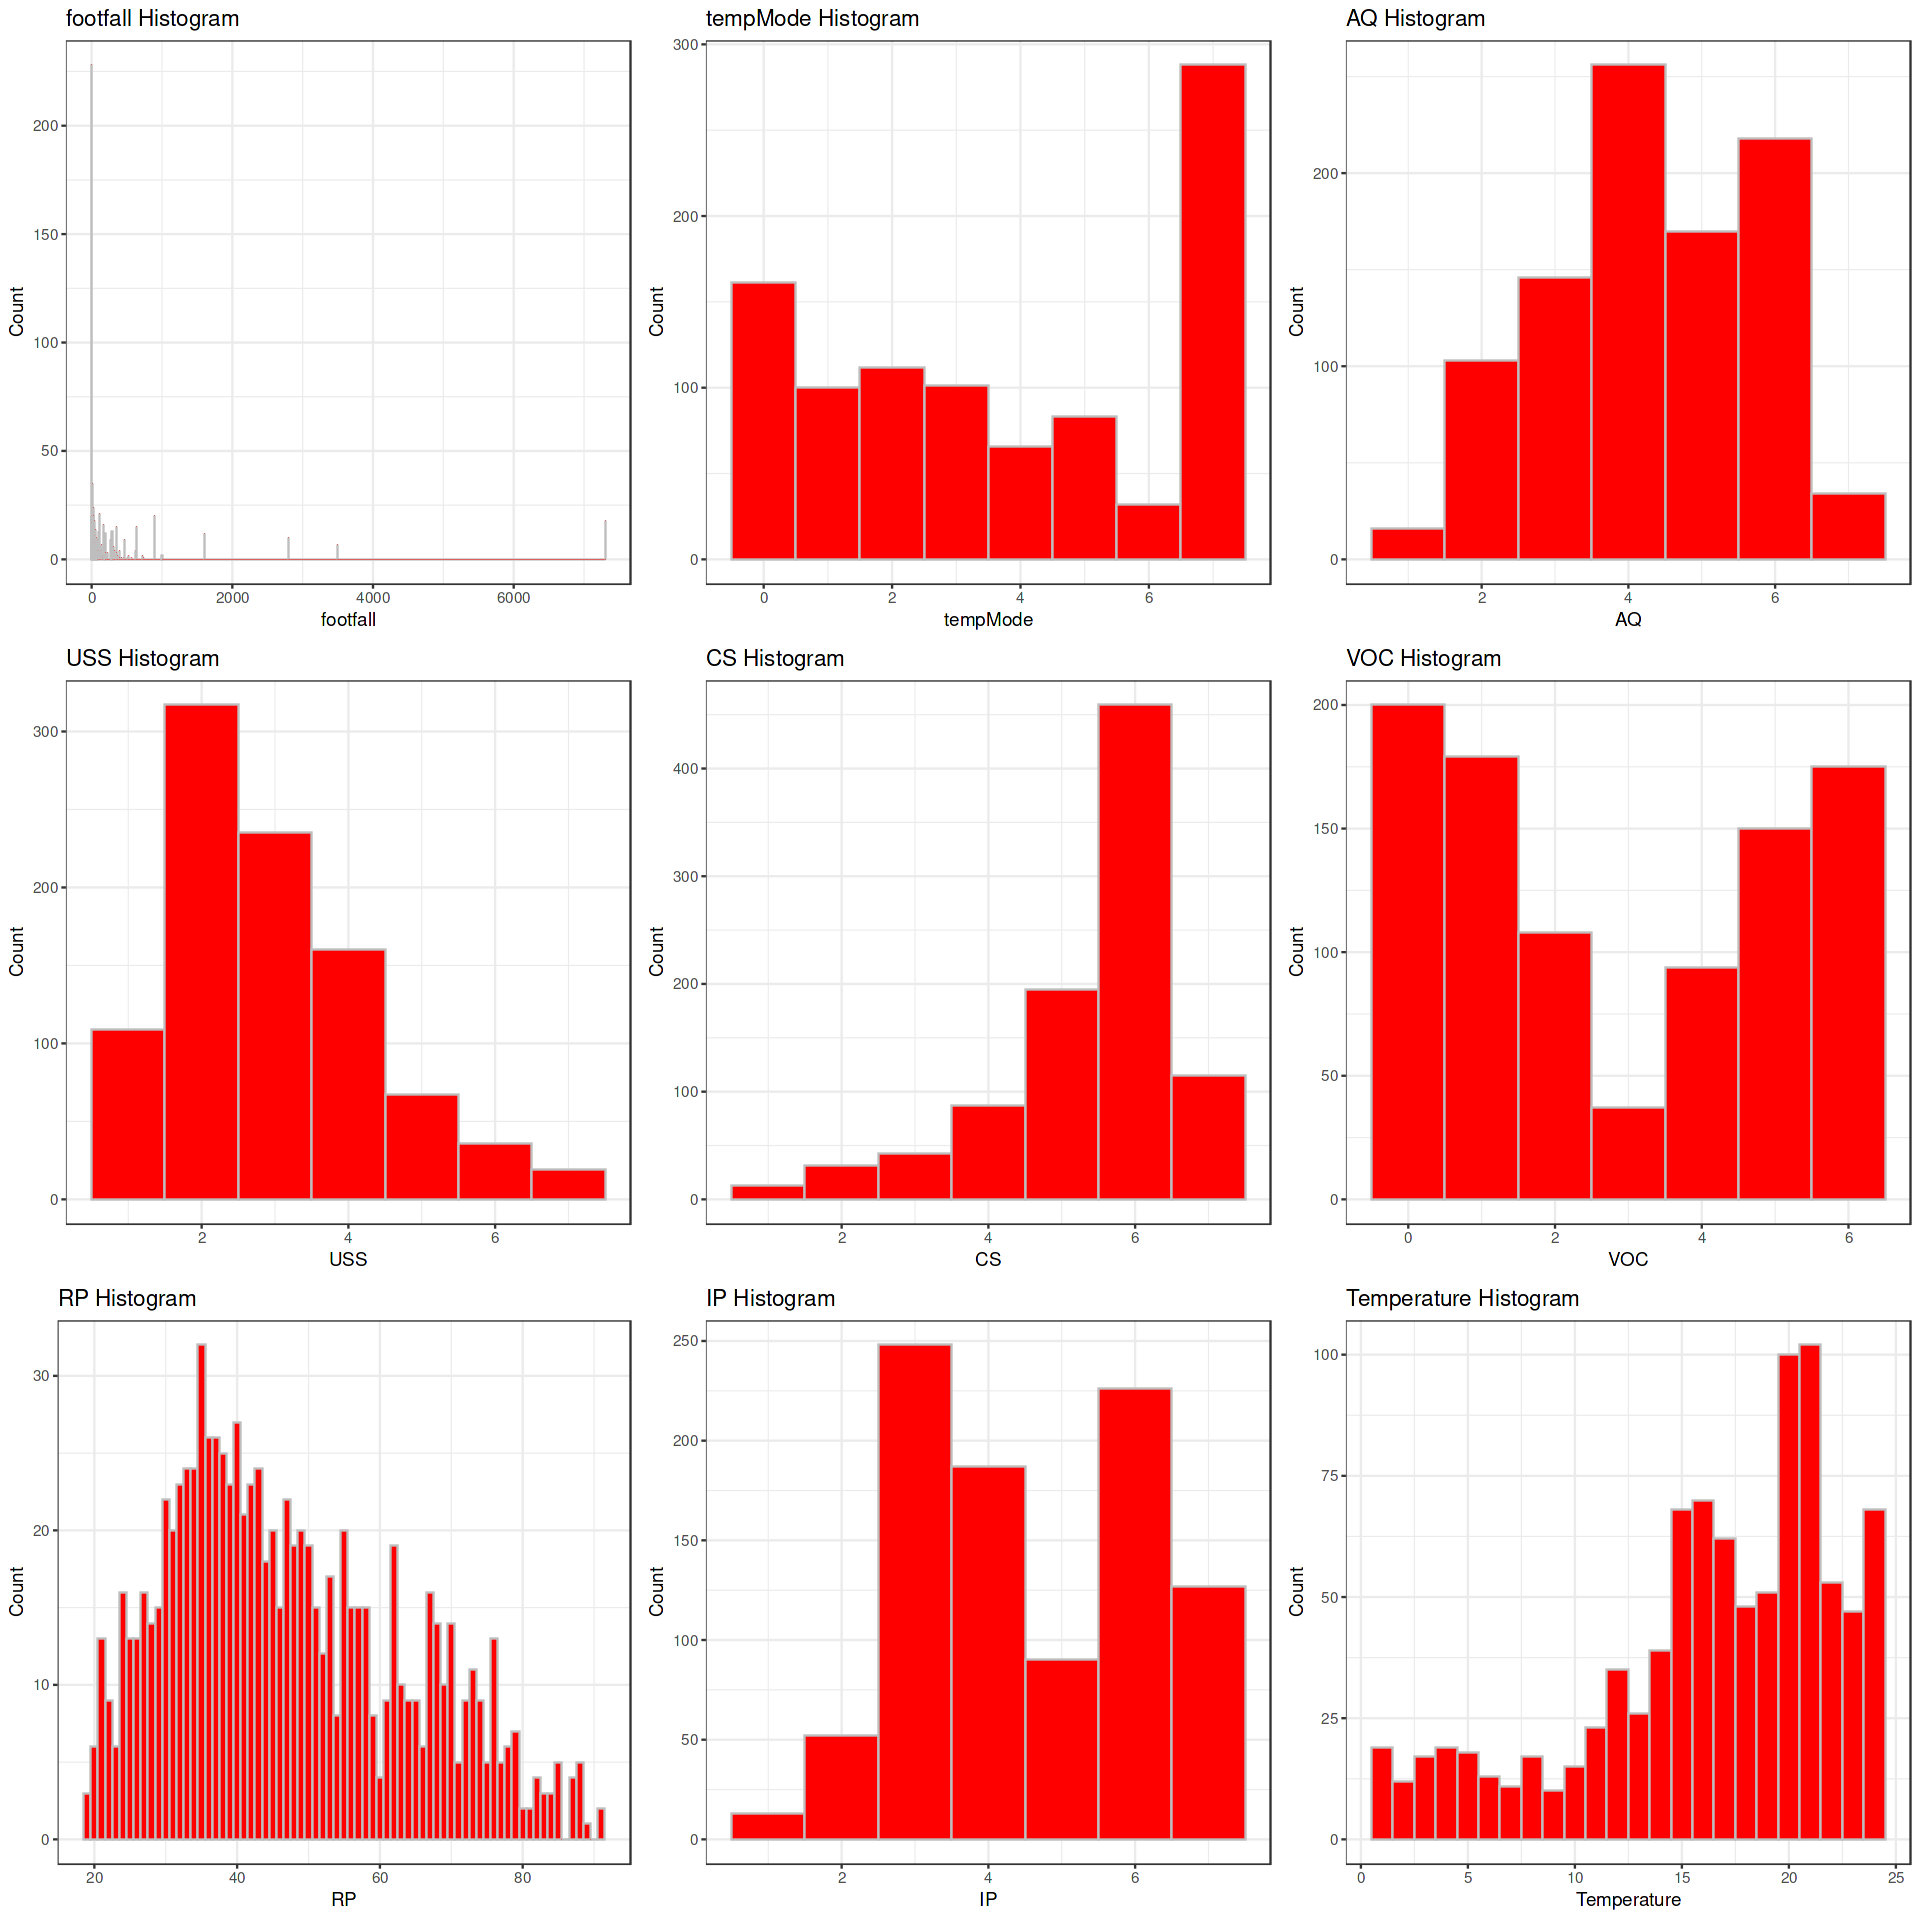

In [453]:
grid.arrange(a,b,c,d,e,f,g,h,i , ncol = 3)

## **Boxplot**

In [454]:
options(repr.plot.width = 16.0, repr.plot.height = 16.0)

In [455]:
a <- ggplot(df) + geom_boxplot(aes(y= footfall , fill = factor(fail))) + 
        labs(title = 'footfall boxplot', x = 'footfall', fill = 'fail') + 
        theme_bw()

b <- ggplot(df) + geom_boxplot(aes(y= tempMode, fill = factor(fail))) + 
        labs(title = 'tempMode boxplot', x = 'tempMode', fill = 'fail') + 
        theme_bw()

c <- ggplot(df) + geom_boxplot(aes(y= AQ, fill = factor(fail))) + 
        labs(title = 'AQ boxplot', x = 'AQ',  fill = 'fail') + 
        theme_bw()

d <- ggplot(df) + geom_boxplot(aes(y= USS, fill = factor(fail))) + 
        labs(title = 'USS boxplot', x = 'USS',  fill = 'fail') + 
        theme_bw()

e <- ggplot(df) + geom_boxplot(aes(y= CS, fill = factor(fail))) + 
        labs(title = 'CS boxplot', x = 'CS',  fill = 'fail') + 
        theme_bw()

f <- ggplot(df) + geom_boxplot(aes(y= VOC, fill = factor(fail))) + 
        labs(title = 'VOC boxplot', x = 'VOC',  fill = 'fail') + 
        theme_bw()

g <- ggplot(df) + geom_boxplot(aes(y= RP, fill = factor(fail))) + 
        labs(title = 'RP boxplot', x = 'RP',  fill = 'fail') + 
        theme_bw()

h <- ggplot(df) + geom_boxplot(aes(y= IP, fill = factor(fail))) + 
        labs(title = 'IP boxplot', x = 'IP',  fill = 'fail') + 
        theme_bw()

i <- ggplot(df) + geom_boxplot(aes(y= Temperature, fill = factor(fail))) +  
        labs(title = 'Temperature boxplot', x = 'Temperature', fill = 'fail') + 
        theme_bw()


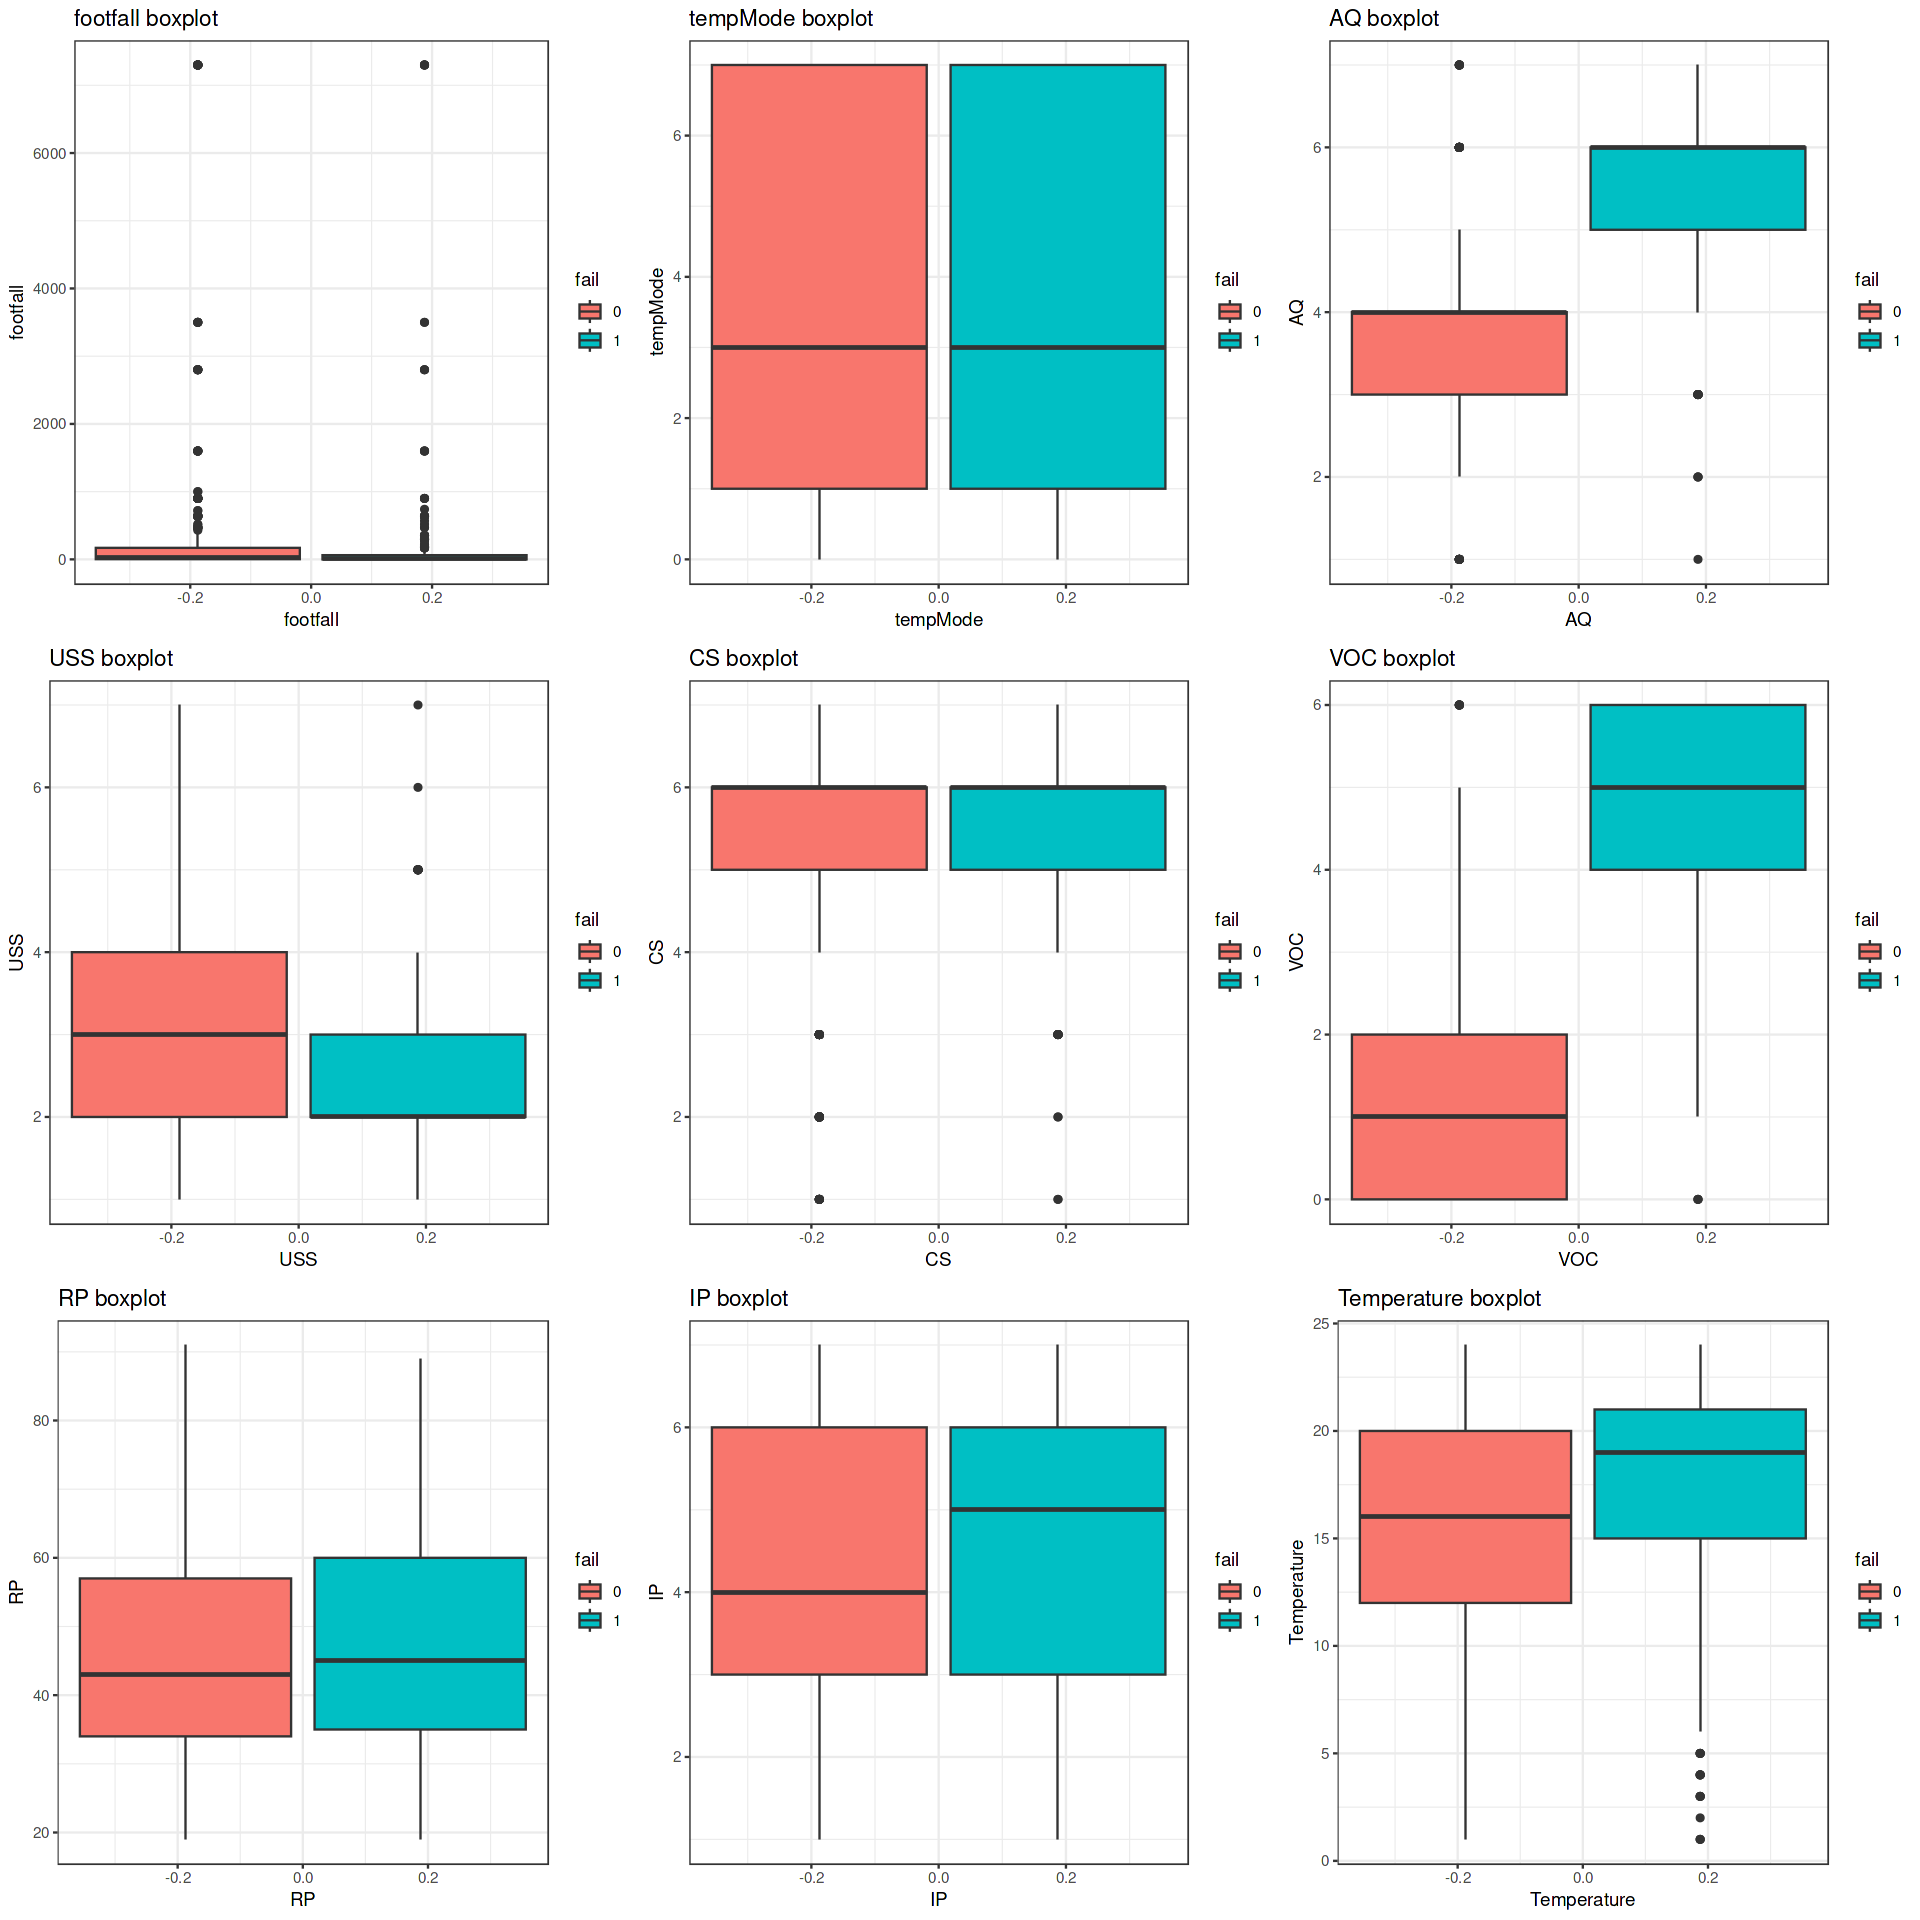

In [456]:
grid.arrange(a,b,c,d,e,f,g,h,i , ncol = 3)

## **CountPlot**

In [457]:
options(repr.plot.width = 12.0, repr.plot.height = 12.0)

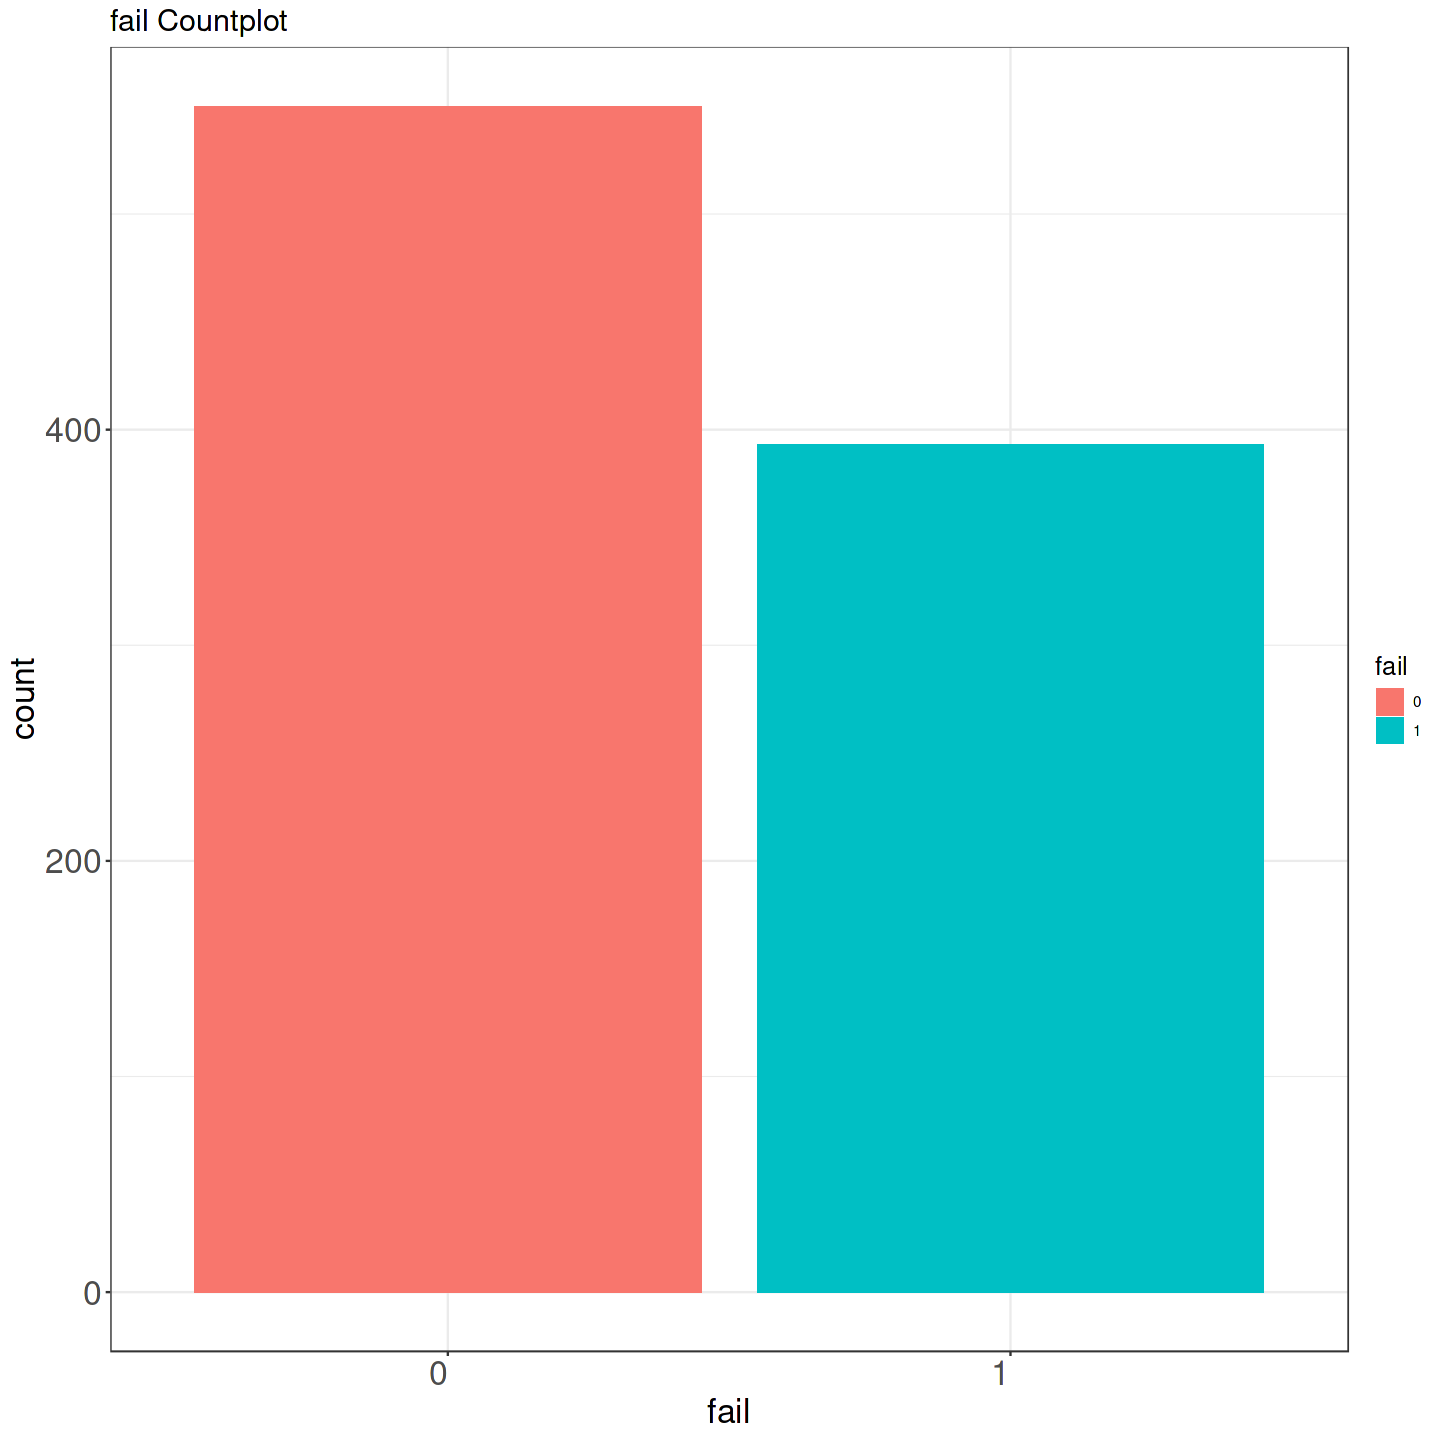

In [458]:
ggplot(df) + geom_bar(aes(x= factor(fail) , fill = factor(fail)), position = 'dodge') +
    theme_bw() +
    ggtitle('fail Countplot') + 
    labs(fill = 'fail', x = 'fail') +
    theme(
    axis.title = element_text(size=20),
    axis.text.x = element_text(size = 20, hjust=1),
    axis.text.y = element_text(size = 20),
    title = element_text(size=15)
    )

## **Correlation**

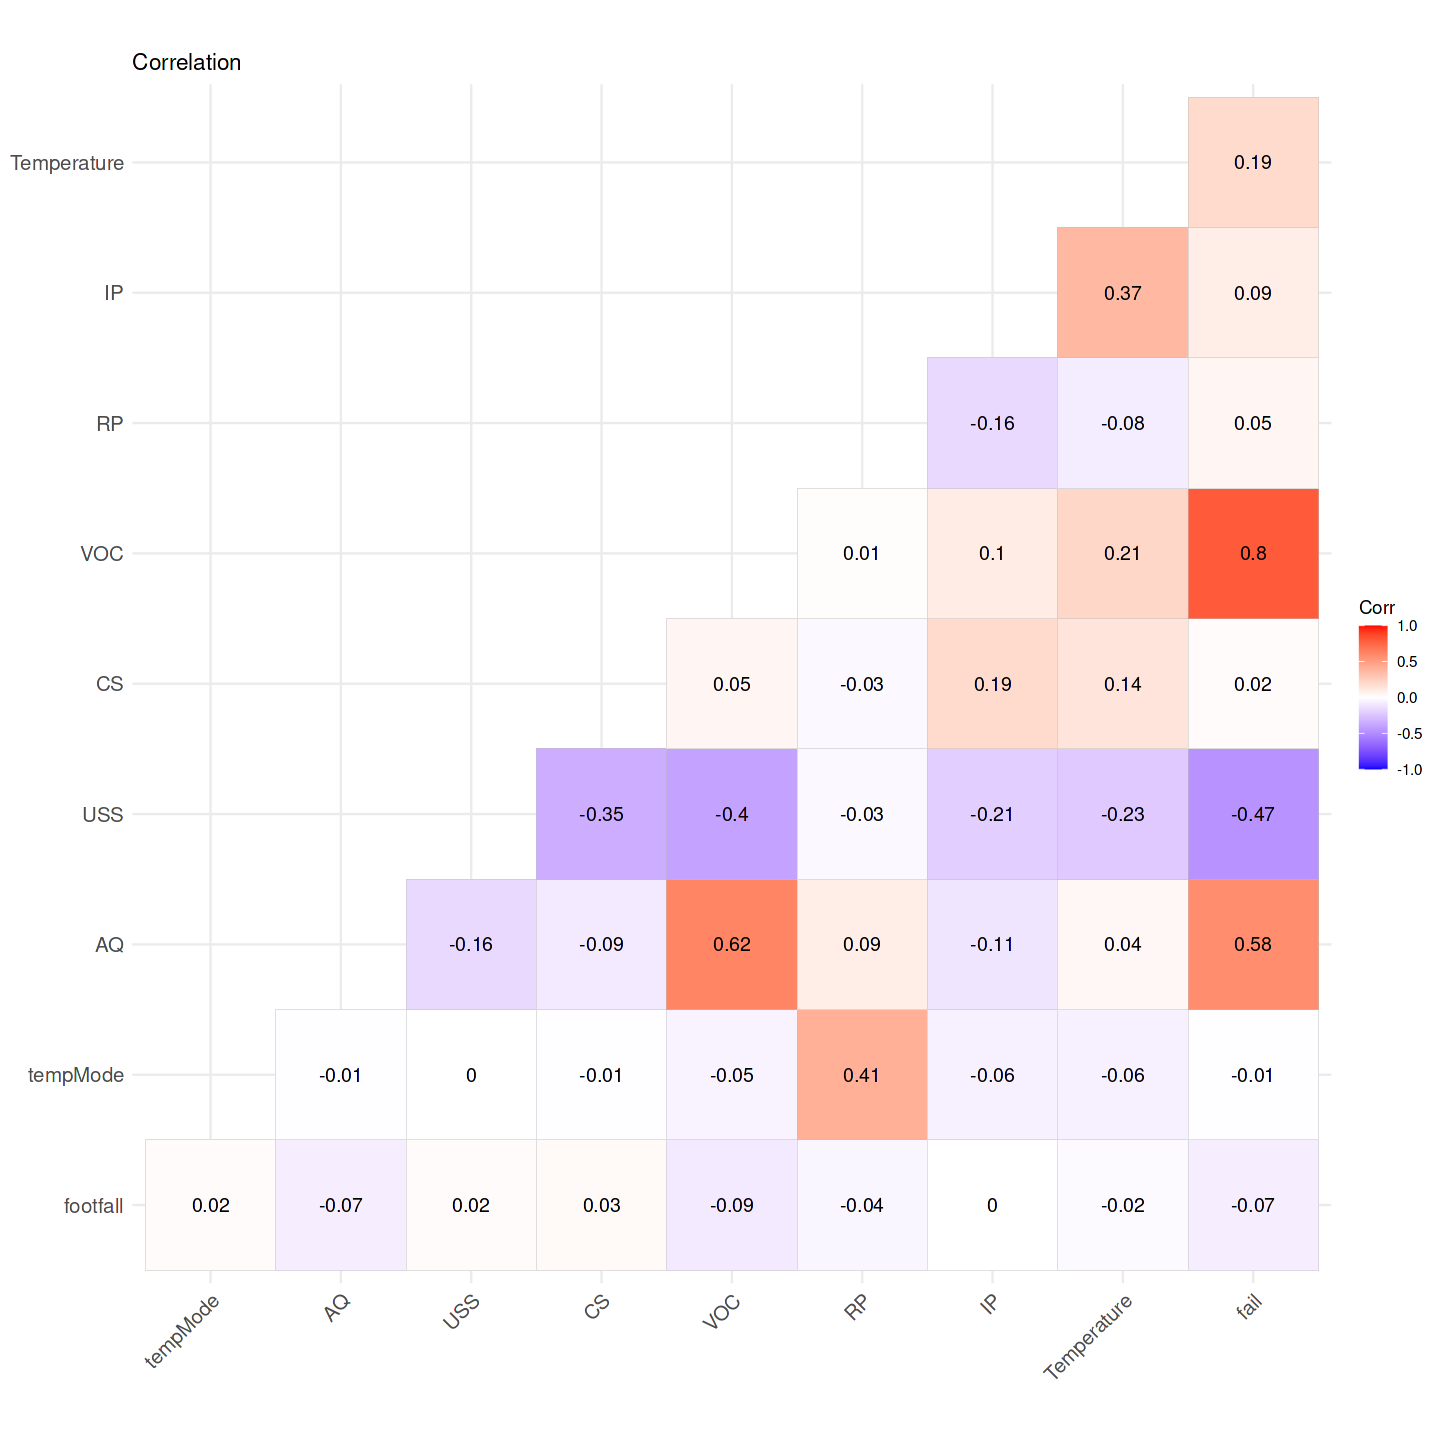

In [459]:
ggcorrplot(cor(df) , type = "lower", lab=T, title = 'Correlation')

# **4. Modeling**

In [460]:
library(tidymodels)
library(finetune)
library(xgboost)
library(bonsai)
library(themis)
library(caret)
library(withr)
library(randomForest)

In [461]:
df$fail <- as.factor(df$fail)

## **Data Split**

In [462]:
idx <- sample(1:nrow(df) , 0.7 * nrow(df))
train <- df[idx,]
test <- df[-idx,]

## **XGB Model**

In [463]:
xgb_rec <-
  recipe(fail ~ ., data = train) %>%
  step_dummy(all_nominal_predictors()) %>%
  step_YeoJohnson(all_numeric_predictors())

In [464]:
xgb_spec <- boost_tree() %>%
  set_engine('xgboost' ,
             nthread  = future::availableCores()) %>%
  set_mode('classification')

In [465]:
xgb_wf <- workflow() %>%
  add_recipe(xgb_rec) %>%
  add_model(xgb_spec)

xgb_wf

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: boost_tree()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_dummy()
• step_YeoJohnson()

── Model ───────────────────────────────────────────────────────────────────────
Boosted Tree Model Specification (classification)

Engine-Specific Arguments:
  nthread = future::availableCores()

Computational engine: xgboost 


In [466]:
model =
  xgb_wf %>% 
  fit(train) %>%
  with_seed(7, .)

In [467]:
model

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: boost_tree()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_dummy()
• step_YeoJohnson()

── Model ───────────────────────────────────────────────────────────────────────
##### xgb.Booster
raw: 37.2 Kb 
call:
  xgboost::xgb.train(params = list(eta = 0.3, max_depth = 6, gamma = 0, 
    colsample_bytree = 1, colsample_bynode = 1, min_child_weight = 1, 
    subsample = 1), data = x$data, nrounds = 15, watchlist = x$watchlist, 
    verbose = 0, nthread = c(system = 4), objective = "binary:logistic")
params (as set within xgb.train):
  eta = "0.3", max_depth = "6", gamma = "0", colsample_bytree = "1", colsample_bynode = "1", min_child_weight = "1", subsample = "1", nthread = "4", objective = "binary:logistic", validate_parameters = "TRUE"
xgb.attributes:
  niter
callbacks:
  cb.evaluation.log()
# of features: 9 
niter: 15
nfeat

In [468]:
pred <- predict(model, test, type = 'class') 

In [469]:
pred <- as.data.frame(pred)

In [470]:
cm_xgb <- confusionMatrix(pred$.pred_class, test$fail)
cm_xgb

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 151  16
         1   9 107
                                         
               Accuracy : 0.9117         
                 95% CI : (0.8724, 0.942)
    No Information Rate : 0.5654         
    P-Value [Acc > NIR] : <2e-16         
                                         
                  Kappa : 0.8191         
                                         
 Mcnemar's Test P-Value : 0.2301         
                                         
            Sensitivity : 0.9437         
            Specificity : 0.8699         
         Pos Pred Value : 0.9042         
         Neg Pred Value : 0.9224         
             Prevalence : 0.5654         
         Detection Rate : 0.5336         
   Detection Prevalence : 0.5901         
      Balanced Accuracy : 0.9068         
                                         
       'Positive' Class : 0              
                                         

## **RandomForest Model**

In [471]:
rf_model <- randomForest(fail ~., data = train, ntree=300)

In [472]:
rf_model


Call:
 randomForest(formula = fail ~ ., data = train, ntree = 300) 
               Type of random forest: classification
                     Number of trees: 300
No. of variables tried at each split: 3

        OOB estimate of  error rate: 10.91%
Confusion matrix:
    0   1 class.error
0 351  39   0.1000000
1  33 237   0.1222222

In [473]:
pred_rf <- predict(rf_model,test)

In [474]:
cm_rf <- confusionMatrix(pred_rf, test$fail)
cm_rf

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 150  13
         1  10 110
                                          
               Accuracy : 0.9187          
                 95% CI : (0.8805, 0.9478)
    No Information Rate : 0.5654          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.8342          
                                          
 Mcnemar's Test P-Value : 0.6767          
                                          
            Sensitivity : 0.9375          
            Specificity : 0.8943          
         Pos Pred Value : 0.9202          
         Neg Pred Value : 0.9167          
             Prevalence : 0.5654          
         Detection Rate : 0.5300          
   Detection Prevalence : 0.5760          
      Balanced Accuracy : 0.9159          
                                          
       'Positive' Class : 0               
                              

# **5. Evaluation**

In [475]:
acc <- data.frame(model = c('XGB','RF') , Accuracy = c(cm_xgb$overall[1], cm_rf$overall[1]))

In [476]:
acc

model,Accuracy
<chr>,<dbl>
XGB,0.9116608
RF,0.9187279


In [477]:
options(repr.plot.width = 16.0, repr.plot.height = 12.0)

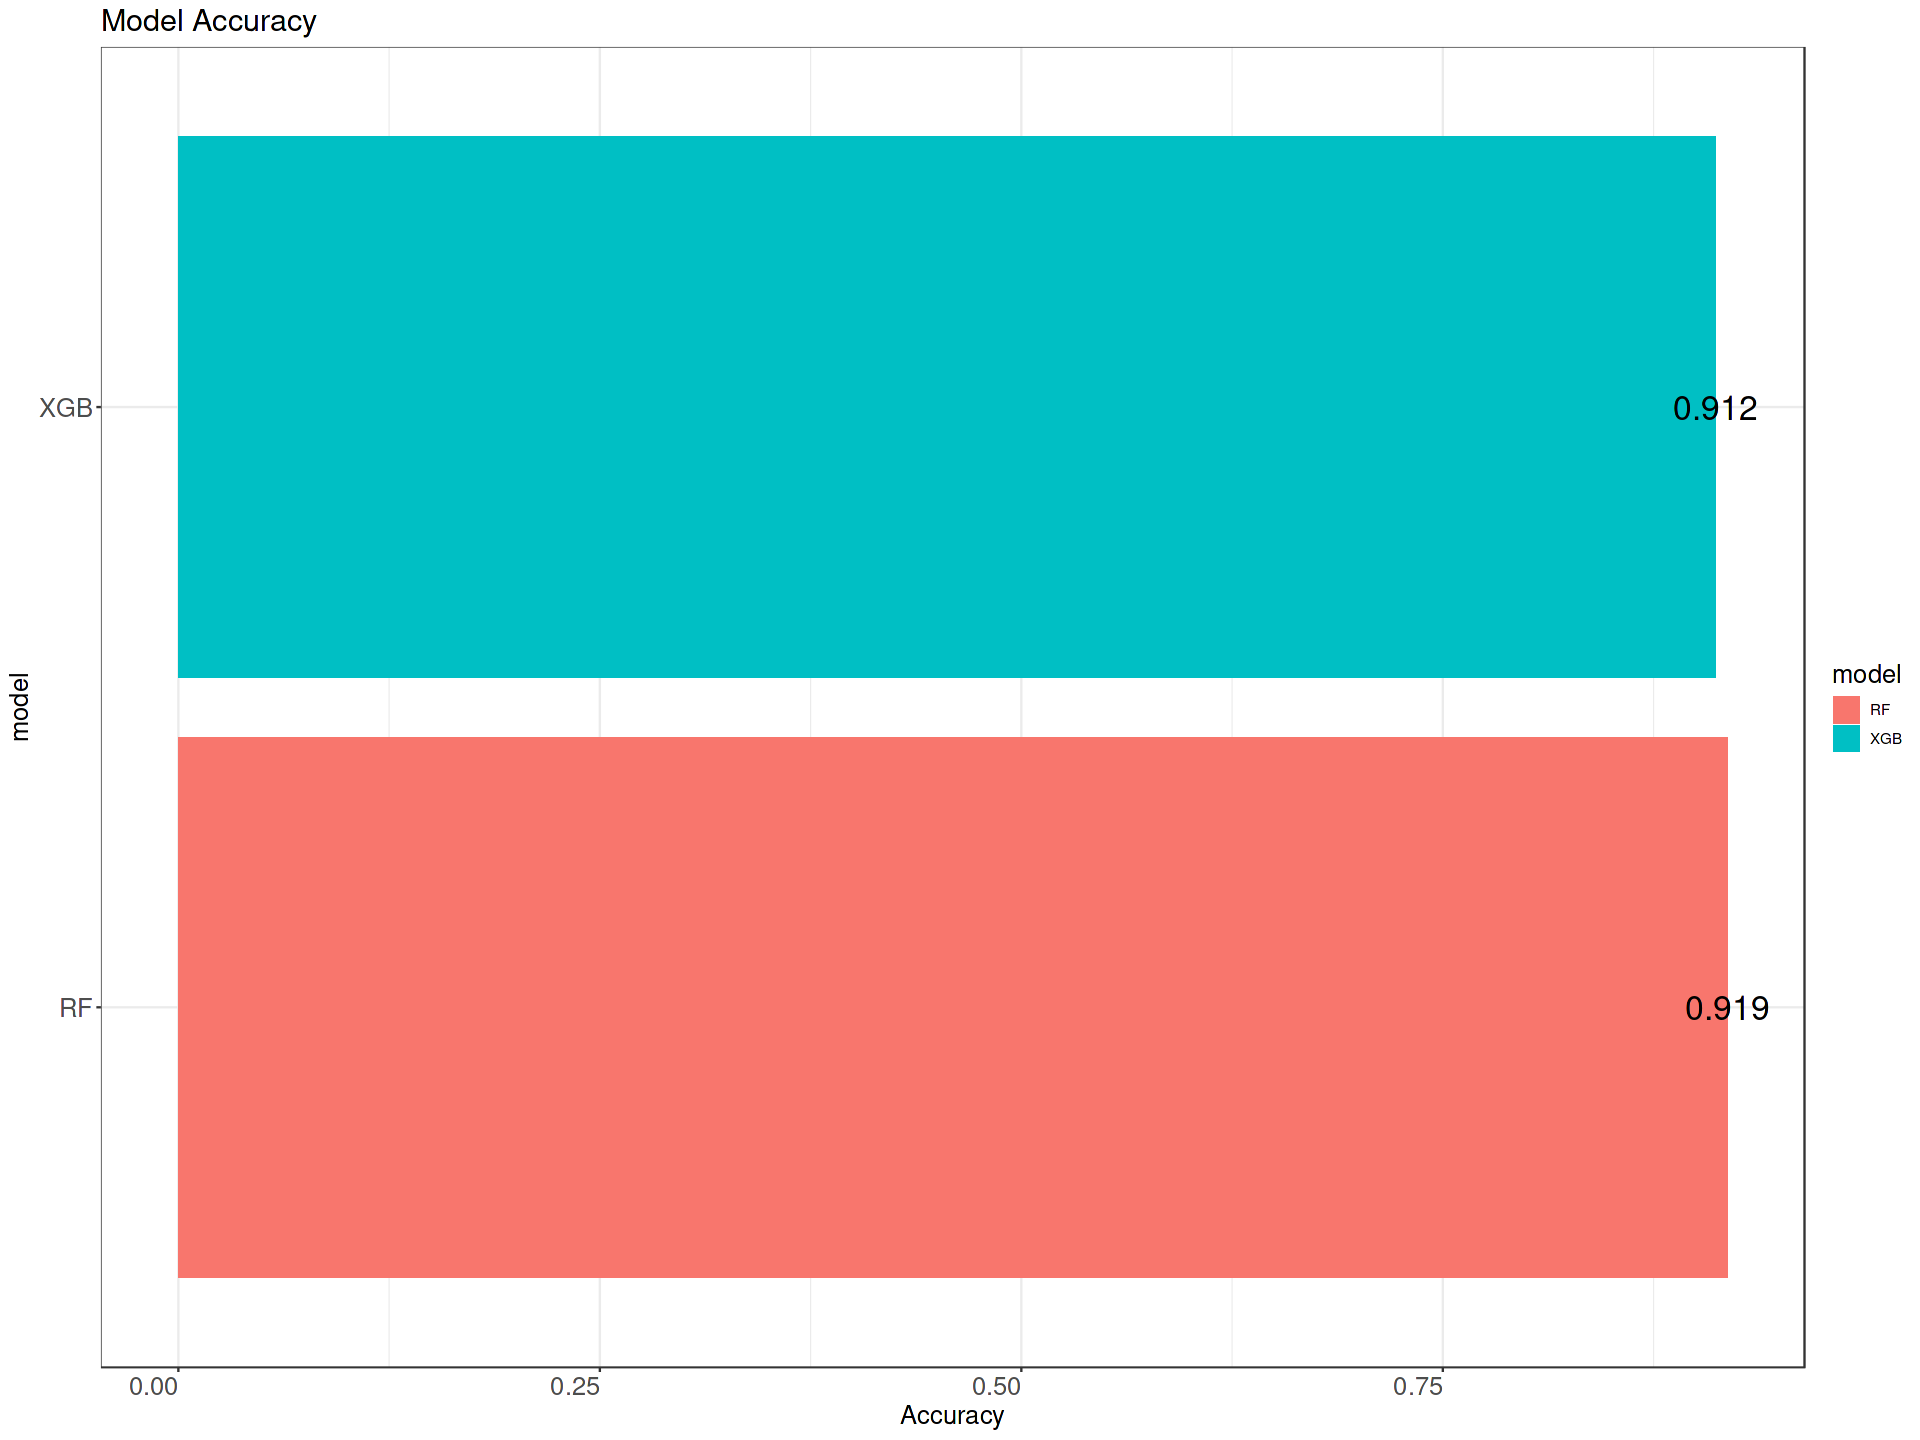

In [478]:
ggplot(acc) + geom_col(aes(y=model , x= Accuracy , fill = model)) +
    geom_text(aes(y = model , x= Accuracy, label= round(Accuracy,3)), hjust=0.5, size = 7) +
    theme_bw() +
    ggtitle('Model Accuracy') + 
    theme(
    axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    axis.text.y = element_text(size = 15, ),
    title = element_text(size=15)
    )

**Please leave your advice in the comments. Thank you**